In [1]:
from setup import *
from utils import (
    load_data, 
    add_features, 
    add_labels, 
    plot_cumulative_returns, 
    split_data,
    plot_precision,
    calculate_returns
    )

In [2]:
asset_data = load_data("USDBRL=X", "2020-01-01", "2023-10-01")
asset_data = add_features(add_labels(asset_data))
asset_data.head()

/home/felipe-nicoletti/Projetos/Pessoal/market-data-market-prediction-ml-study/utils.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date, interval="1wk")
[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume,target,returns,volatility,ma_4,ma_12,ma_ratio,momentum_5,momentum_10,momentum_50
Date,,,,,,,,,,,,,,
2020-12-16,5.118938,5.2203,5.041700,5.080800,0,1,0.000242,0.002520,5.166510,5.414895,0.954129,-0.295962,-0.410762,1.058538
2020-12-23,5.245900,5.3055,5.127974,5.156904,0,1,0.024802,0.017367,5.145210,5.387603,0.955009,-0.194700,-0.359700,1.100100
2020-12-30,5.295300,5.3503,5.116400,5.208600,0,1,0.009417,0.010879,5.194460,5.368070,0.967659,-0.035800,-0.327400,1.106800
2021-01-06,5.487700,5.5120,5.231207,5.284500,0,0,0.036334,0.019033,5.286960,5.358245,0.986696,0.389400,-0.253400,1.281600
2021-01-13,5.294800,5.3500,5.193143,5.321100,0,1,-0.035151,0.050548,5.330925,5.330920,1.000001,0.177100,-0.089900,1.048000


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [4]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression())
])

In [5]:
X = asset_data[["ma_ratio", "ma_4","momentum_50", "volatility", "Close"]]
y = asset_data["target"]

X_train, X_test, y_train, y_test = split_data(
    X,
    y
)

In [6]:
pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [7]:
predictions = pipeline.predict(X_test)
probas = pipeline.predict_proba(X_test)[:, 1]
predictions = (probas > 0.5).astype(int)

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, target_names=["Down", "Up"]))

              precision    recall  f1-score   support

        Down       0.80      0.17      0.29        23
          Up       0.51      0.95      0.67        21

    accuracy                           0.55        44
   macro avg       0.66      0.56      0.48        44
weighted avg       0.66      0.55      0.47        44



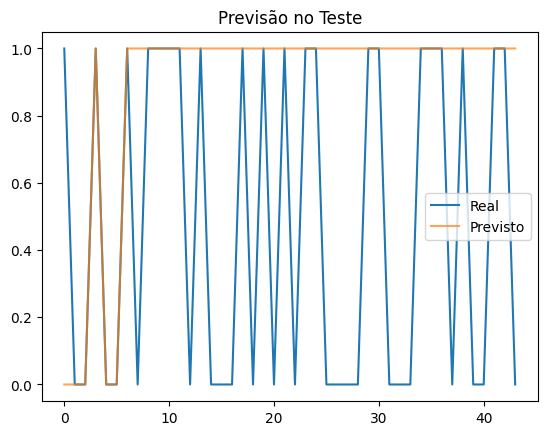

In [9]:
plot_precision(y_test.values, predictions)

In [10]:
all_predictions = pipeline.predict(X)
all_probas = pipeline.predict_proba(X)[:, 1]
all_predictions = (all_probas > 0.5).astype(int)

asset_data = calculate_returns(asset_data, all_predictions)
asset_data.head()

,Close,High,Low,Open,Volume,target,returns,volatility,ma_4,ma_12,ma_ratio,momentum_5,momentum_10,momentum_50,predicted_target,real_return,cumulative_real_return,cumulative_predicted_return
Date,,,,,,,,,,,,,,,,,,
2020-12-16,5.118938,5.2203,5.041700,5.080800,0,1,0.000242,0.002520,5.166510,5.414895,0.954129,-0.295962,-0.410762,1.058538,1,0.000242,1.000242,1.000242
2020-12-23,5.245900,5.3055,5.127974,5.156904,0,1,0.024802,0.017367,5.145210,5.387603,0.955009,-0.194700,-0.359700,1.100100,1,0.024802,1.025050,1.025050
2020-12-30,5.295300,5.3503,5.116400,5.208600,0,1,0.009417,0.010879,5.194460,5.368070,0.967659,-0.035800,-0.327400,1.106800,1,0.009417,1.034703,1.034703
2021-01-06,5.487700,5.5120,5.231207,5.284500,0,0,0.036334,0.019033,5.286960,5.358245,0.986696,0.389400,-0.253400,1.281600,1,0.036334,1.072298,1.072298
2021-01-13,5.294800,5.3500,5.193143,5.321100,0,1,-0.035151,0.050548,5.330925,5.330920,1.000001,0.177100,-0.089900,1.048000,1,-0.035151,1.034605,1.034605


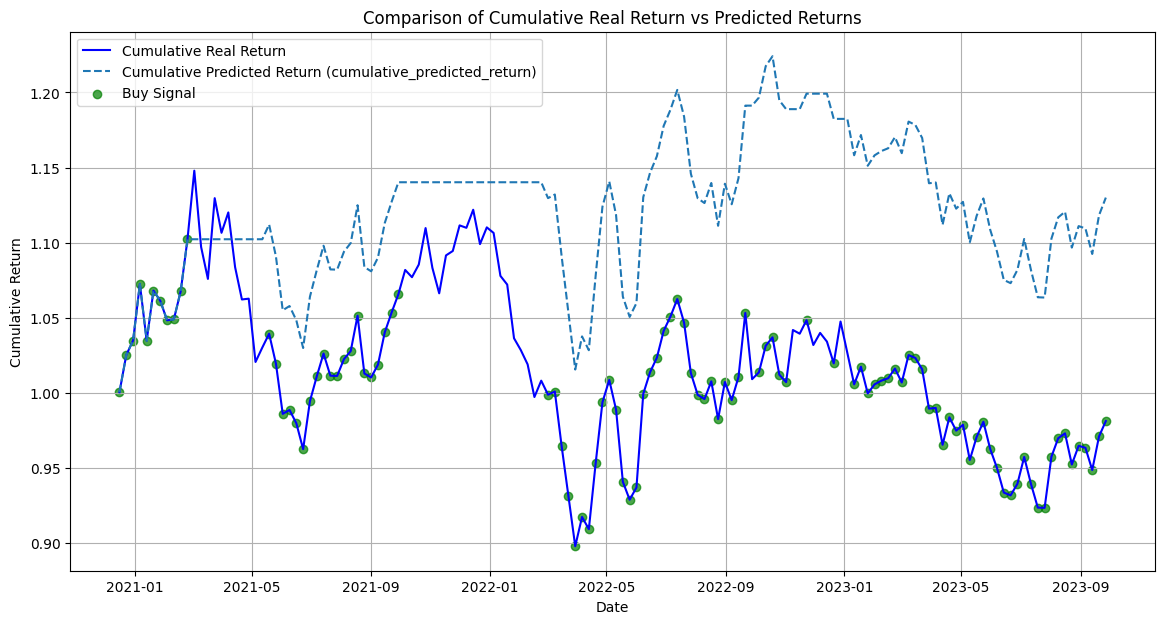

In [11]:
plot_cumulative_returns(
    data=asset_data,
    real_column="cumulative_real_return",
    predicted_columns=["cumulative_predicted_return"],
    target_column="predicted_target"
)